In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot

uint8
(512, 1024, 3)


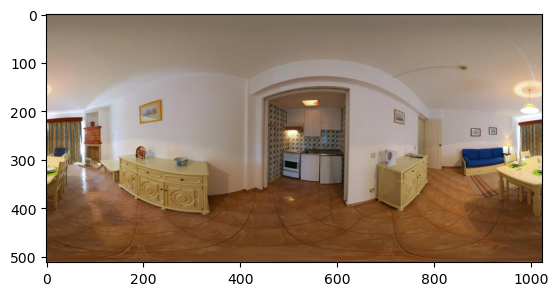

In [4]:
filepath = './dataset/sun360/1.jpg'
# load image as pixel array
image = image.imread(filepath)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

(3, 1024, 3)
(512, 3, 3)


In [19]:
# print rgb
def print_row_rgb(x):
    R,G,B = x[...,0],x[...,1],x[...,2]
    for i in range(x.shape[0]):
        print('i-th row : ',i)
        print('R : ',R[i])
        print('R : ',R[i].mean(), R[i].std())
        print('G : ',G[i])
        print('B : ',B[i])

In [20]:
print_row_rgb(first_third_row)

i-th row :  0
R :  [124 124 124 ... 124 124 124]
R :  125.765625 1.2085914774542306
G :  [113 113 113 ... 113 113 113]
B :  [95 95 95 ... 95 95 95]
i-th row :  1
R :  [125 125 125 ... 125 125 125]
R :  126.140625 1.0878187392093408
G :  [114 114 114 ... 114 114 114]
B :  [96 96 96 ... 96 96 96]
i-th row :  2
R :  [128 128 128 ... 128 128 128]
R :  126.6015625 1.2395805978611274
G :  [115 115 115 ... 115 115 115]
B :  [98 98 98 ... 98 98 98]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import image
from matplotlib import pyplot
import matplotlib
from PIL import Image

# Define a function to visualize RGB values as heatmaps
def run(filepath, method):
    """
    This function takes a section of an image and a title,
    and plots heatmaps for the Red, Green, and Blue channels of the section with a fixed range of 0-255.
    
    """
    print('Visualizing .. ',filepath)
    filepath = filepath #'./dataset/sun360/1.jpg'
    # load image as pixel array
    filetype = filepath[-3:]
    print(filetype)
    if filetype=='jpg':
        image = matplotlib.image.imread(filepath)
    else:
        image = Image.open(filepath).convert('RGB')
        image = np.array(image, dtype = np.uint8)
        
        
    # summarize shape of the pixel array
    print(image.dtype)
    print(image.shape)
    # display the array of pixels as an image
    pyplot.imshow(image)
    pyplot.show()

    
    first_third_row = image[0:3]
    last_third_row = image[-3:]
    # print(first_third_row.shape)

    first_third_col = image[:,0:3]
    last_third_col = image[:,-3:]
    first_last_col = np.concatenate((image[:,0], image[:,-1]), axis=0)
    # print(first_third_col.shape)

    # Visualize the RGB values for the first three rows with fixed range
    visualize(first_third_row, method+'_First to Third Row RGB Channels')

    # Visualize the RGB values for the last three rows with fixed range
    visualize(last_third_row, method+'_Last to Third-Last Row RGB Channels')

    # Visualize the RGB values for the first three columns with fixed range
    visualize(first_third_col, method+'_First to Third Column RGB Channels')

    # Visualize the RGB values for the last three columns with fixed range
    visualize(last_third_col, method+'_Last to Third-Last Column RGB Channels')
    
    # Visualize the RGB values for the last three columns with fixed range
    # visualize(first_last_col, method+'_First to Last Column RGB Channels')


def visualize(section, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    # Separate the channels
    R, G, B = section[..., 0], section[..., 1], section[..., 2]

    # Create a heatmap for each channel with a fixed range of 0-255
    for ax, channel, cmap, channel_name in zip(axes, [R, G, B], ['Reds', 'Greens', 'Blues'], ['Red', 'Green', 'Blue']):
        print(channel.shape)
        im = ax.imshow(channel, cmap=cmap, interpolation='nearest', aspect='auto', vmin=0, vmax=255)
        ax.set_title(f'{channel_name} Channel')
        fig.colorbar(im, ax=ax, orientation='vertical')
        ax.axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()


In [38]:
from PIL import Image
filepath = './dataset/sun360/1.jpg'
im = Image.open(filepath).convert('RGB')
im = np.array(im, dtype = np.uint8)
im.shape

(512, 1024, 3)

Visualizing ..  ./dataset/sun360/1.jpg
jpg
uint8
(512, 1024, 3)


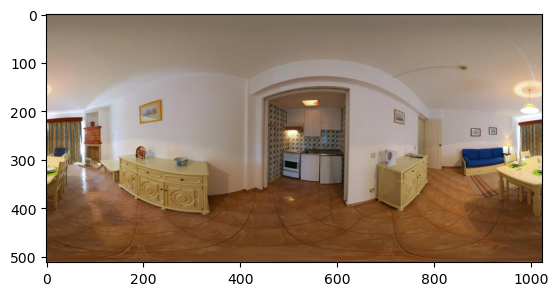

(3, 1024)
(3, 1024)
(3, 1024)


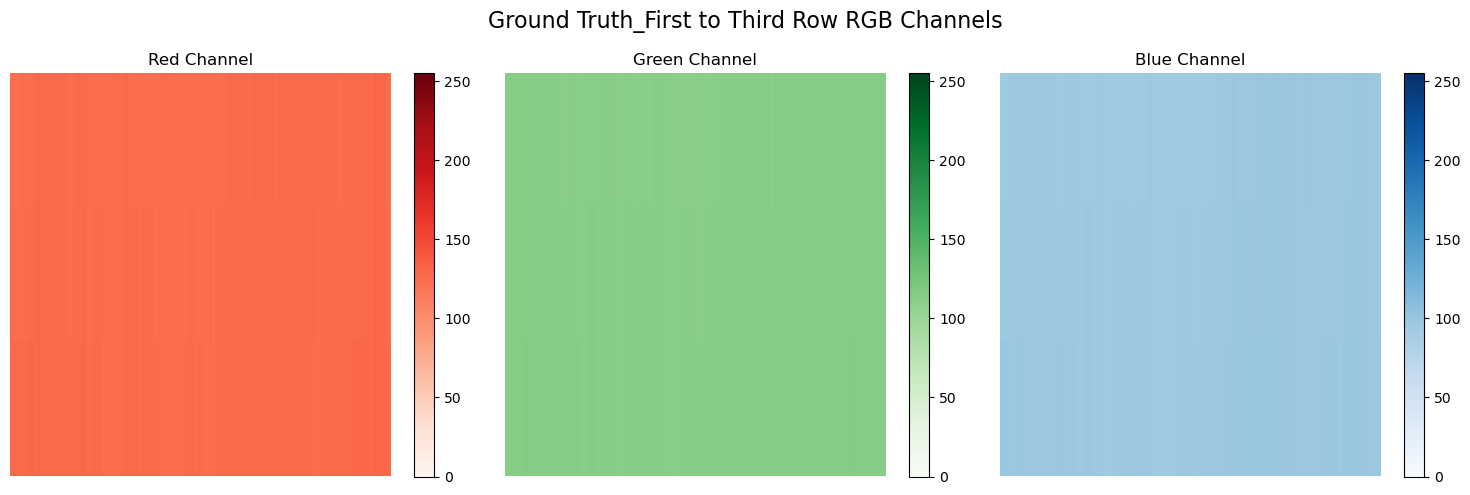

(3, 1024)
(3, 1024)
(3, 1024)


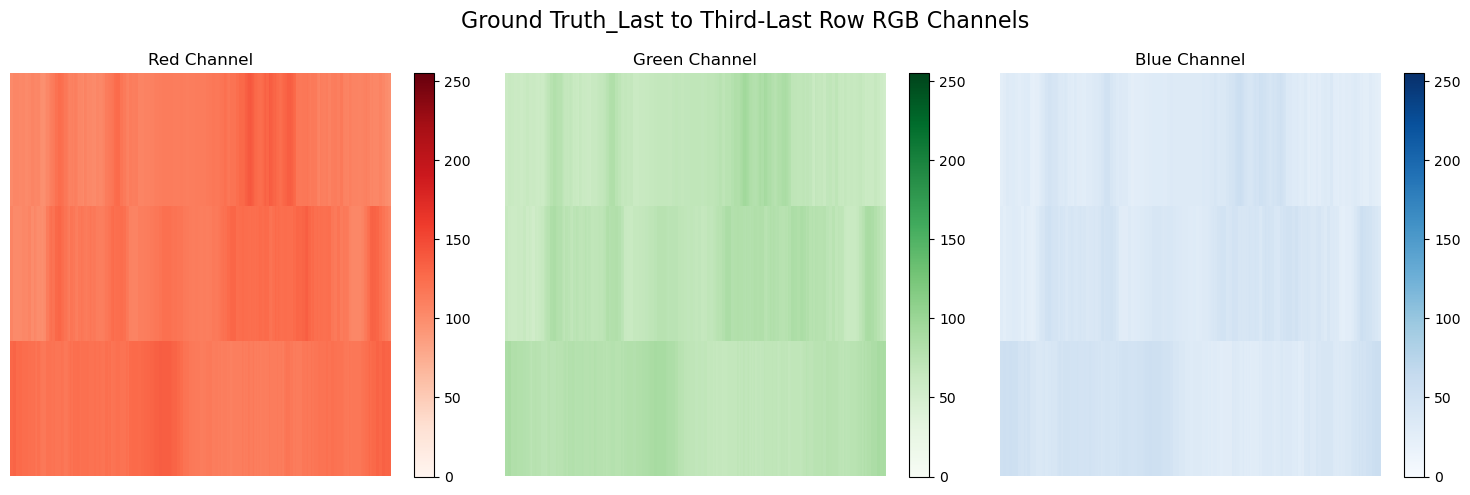

(512, 3)
(512, 3)
(512, 3)


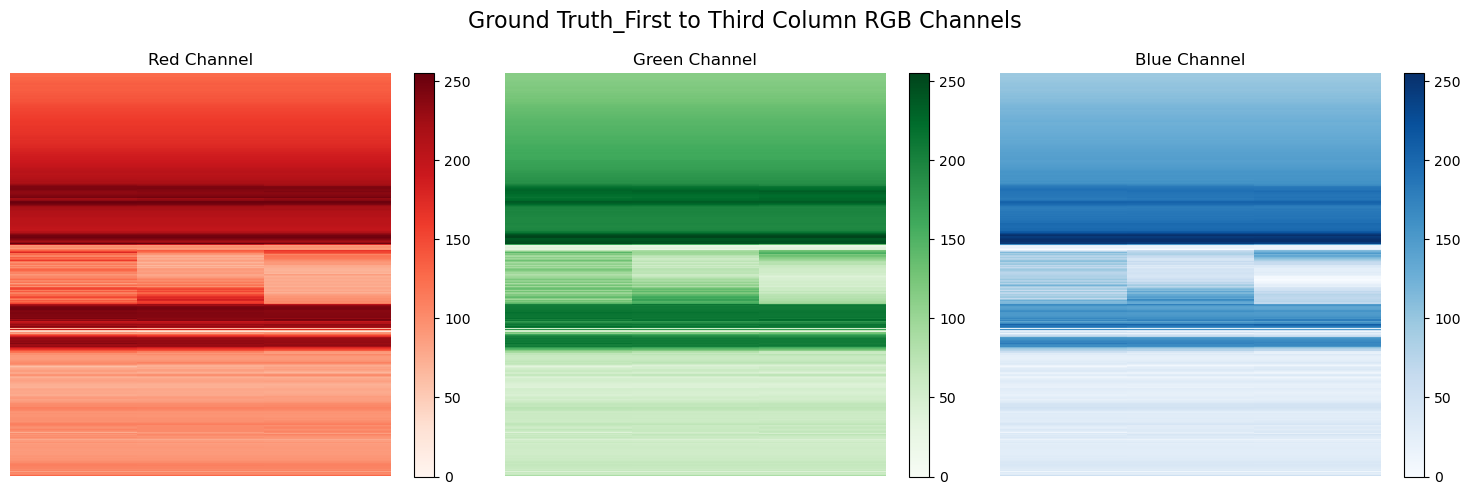

(512, 3)
(512, 3)
(512, 3)


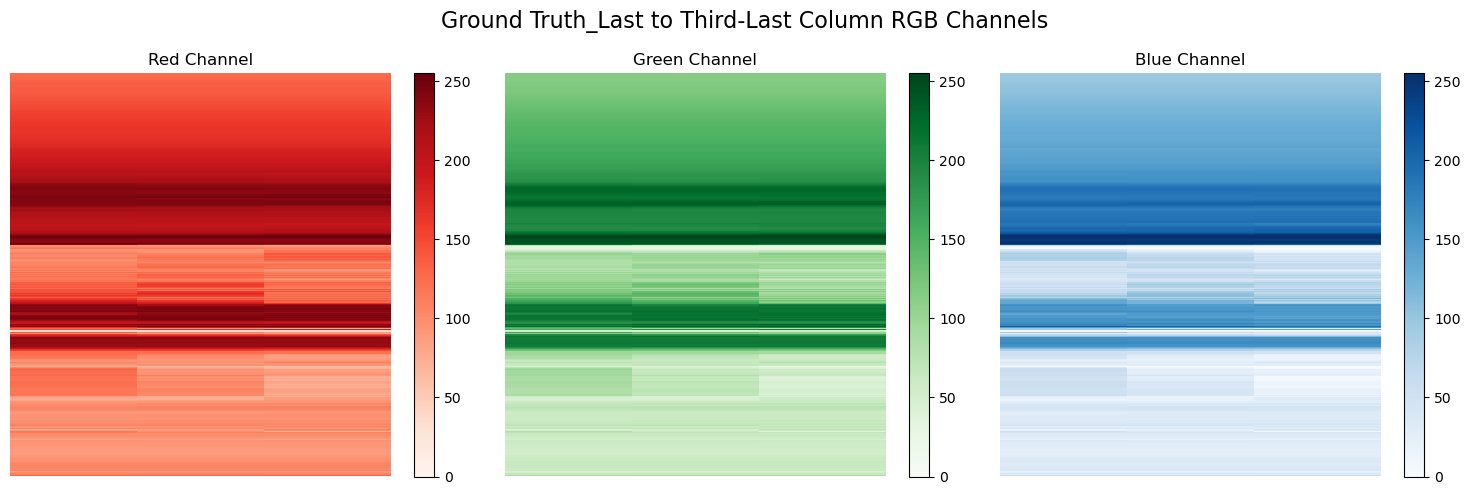

Visualizing ..  ./image/gauss_image_pred.png
png
uint8
(512, 1024, 3)


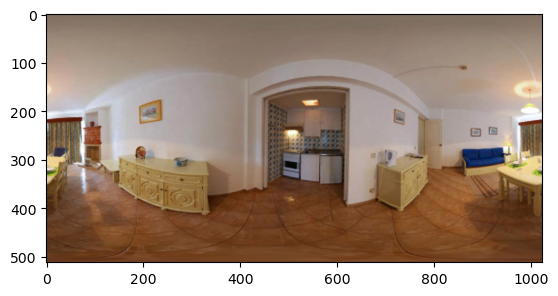

(3, 1024)
(3, 1024)
(3, 1024)


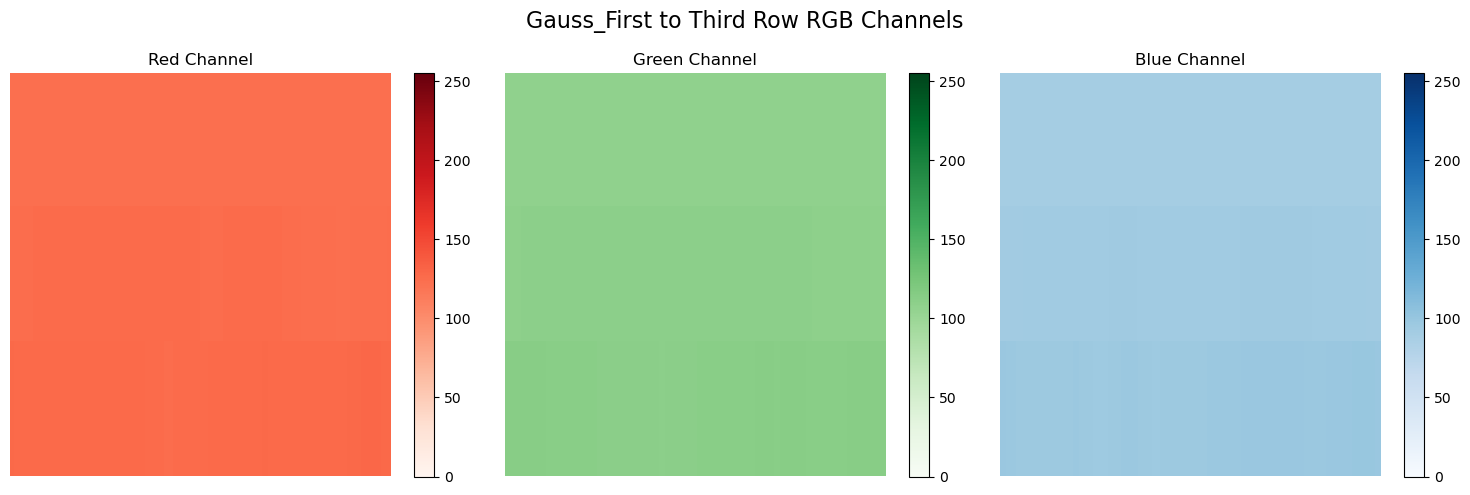

(3, 1024)
(3, 1024)
(3, 1024)


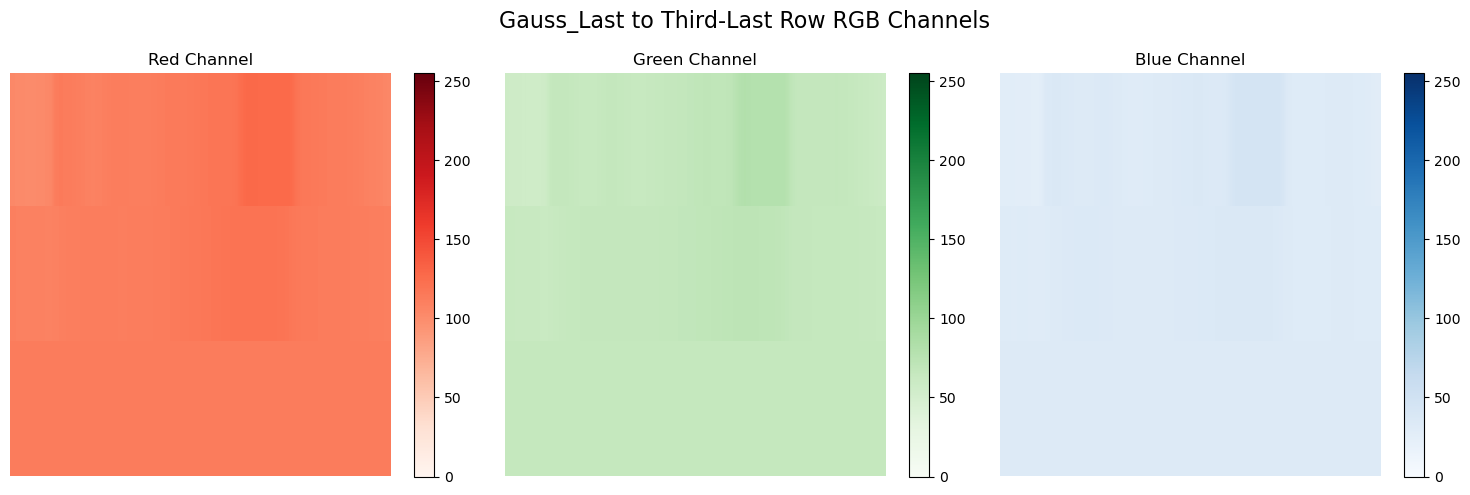

(512, 3)
(512, 3)
(512, 3)


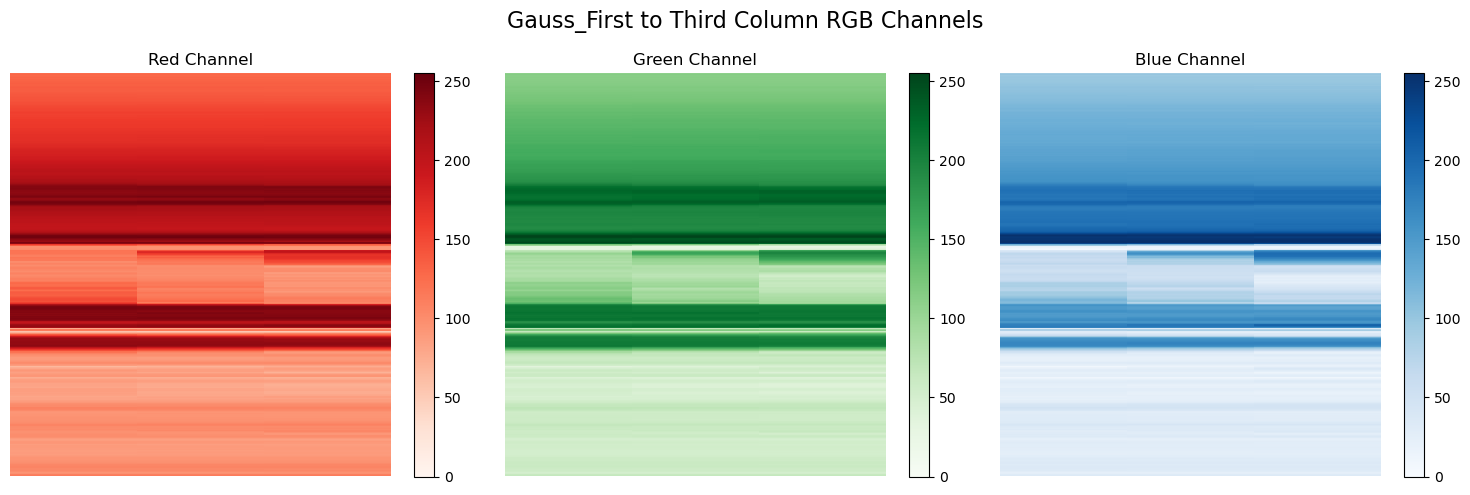

(512, 3)
(512, 3)
(512, 3)


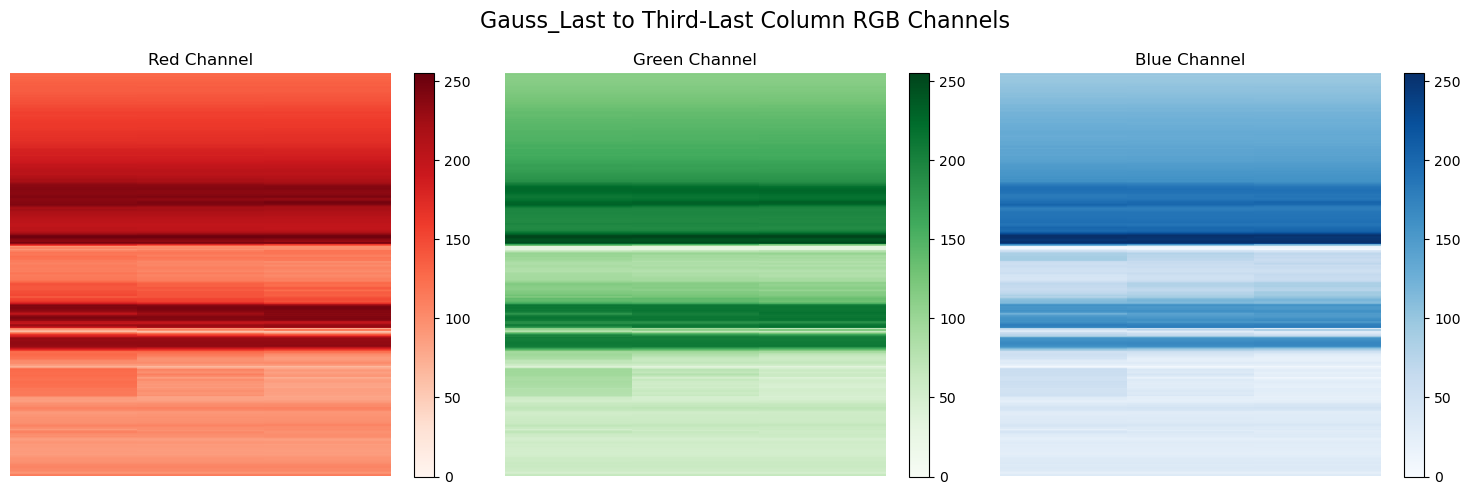

Visualizing ..  ./image/ngp_image_pred.png
png
uint8
(512, 1024, 3)


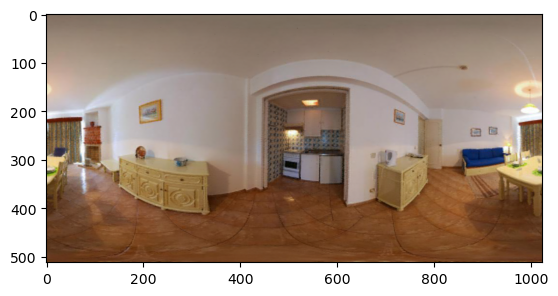

(3, 1024)
(3, 1024)
(3, 1024)


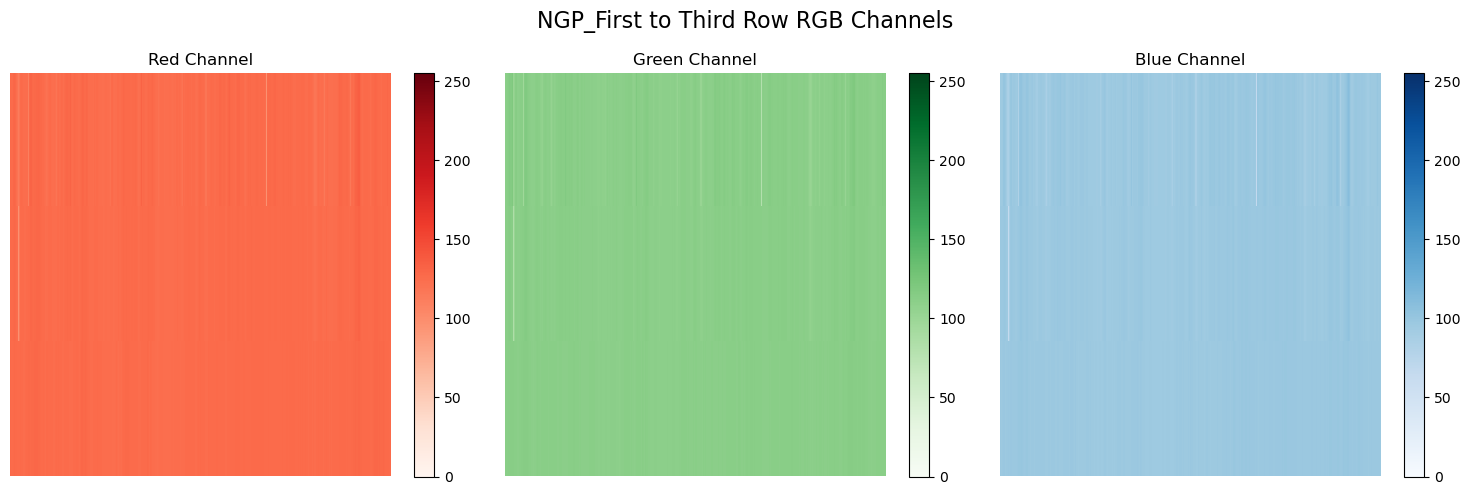

(3, 1024)
(3, 1024)
(3, 1024)


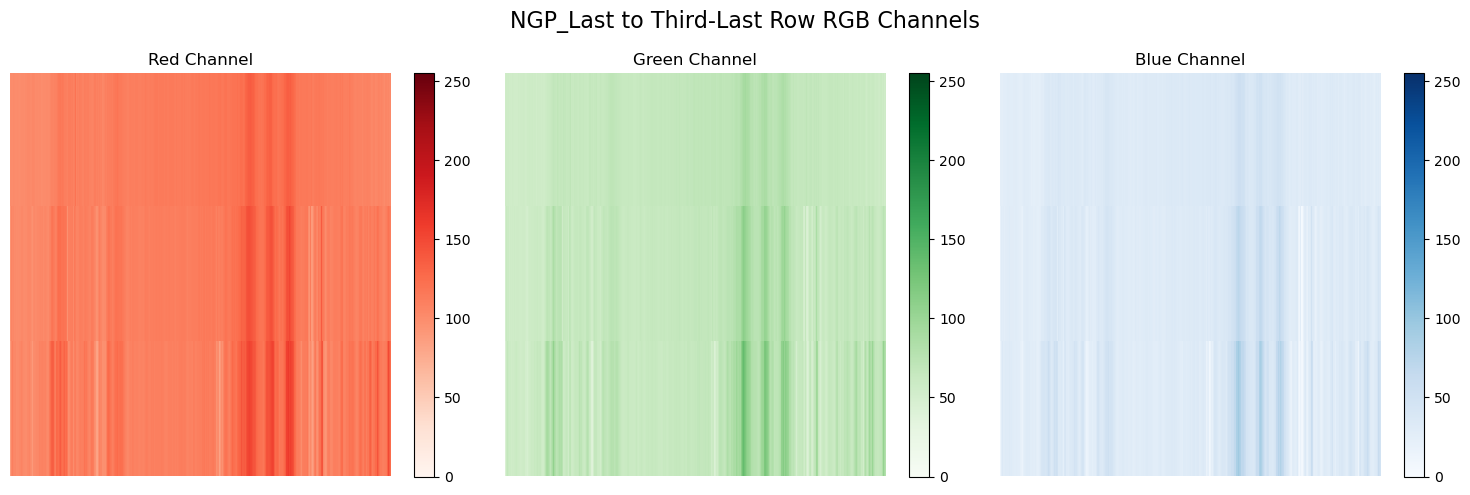

(512, 3)
(512, 3)
(512, 3)


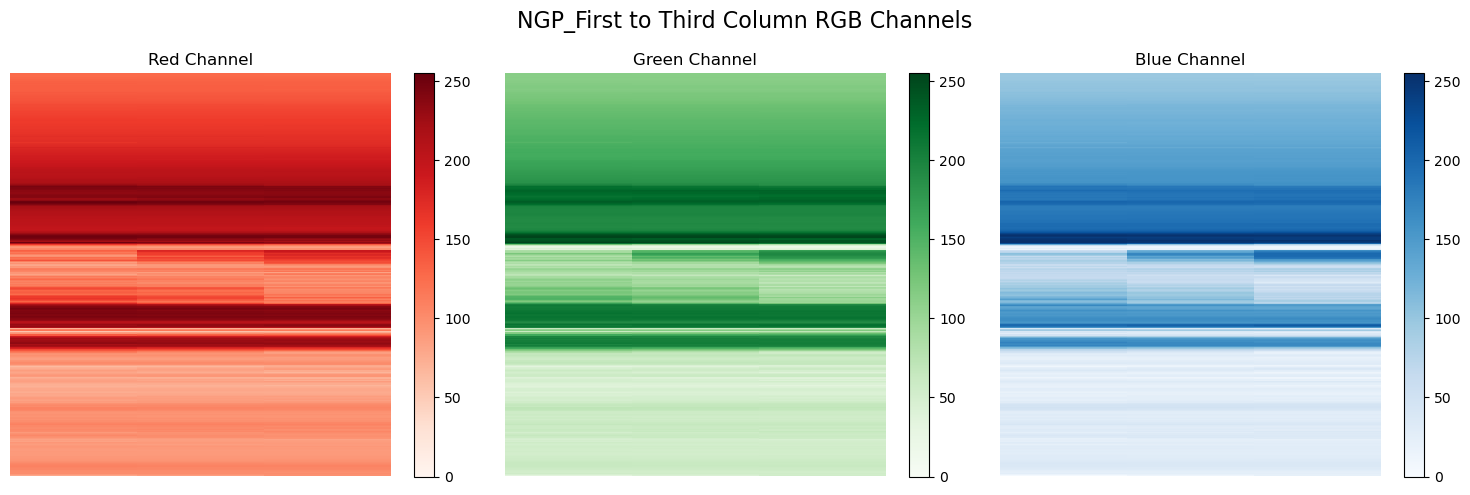

(512, 3)
(512, 3)
(512, 3)


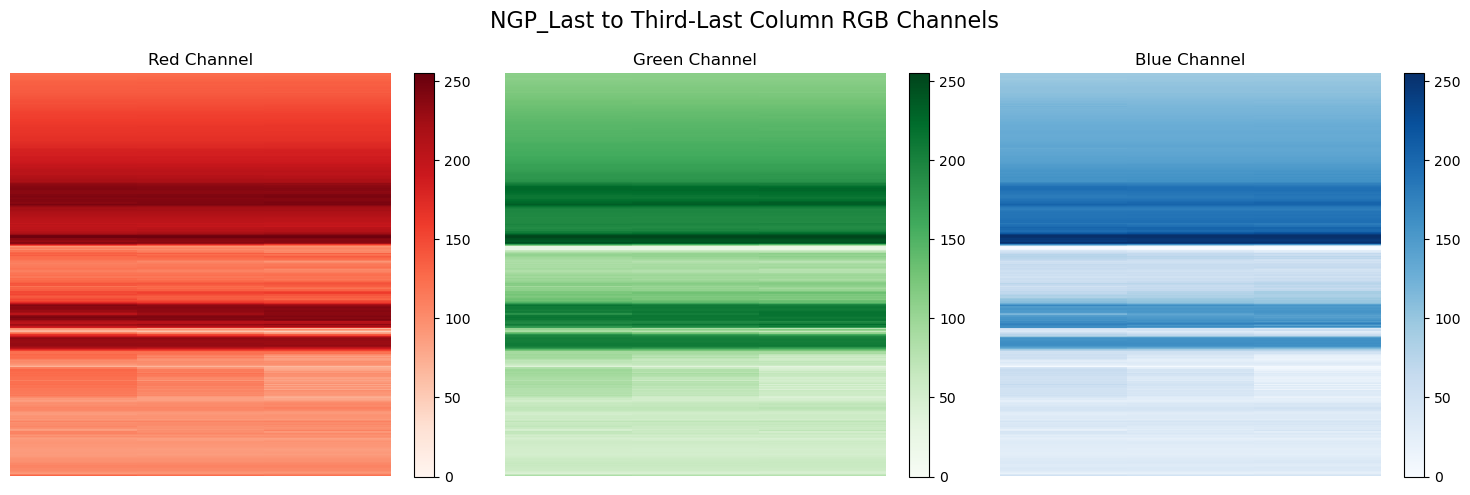

Visualizing ..  ./image/ngp_3d_image_pred.png
png
uint8
(512, 1024, 3)


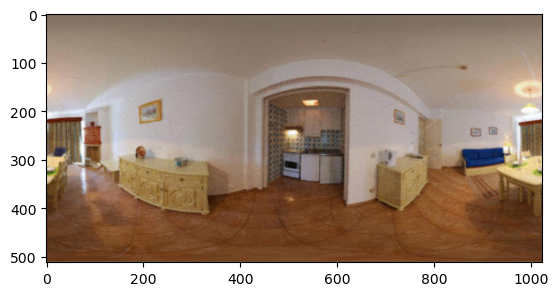

(3, 1024)
(3, 1024)
(3, 1024)


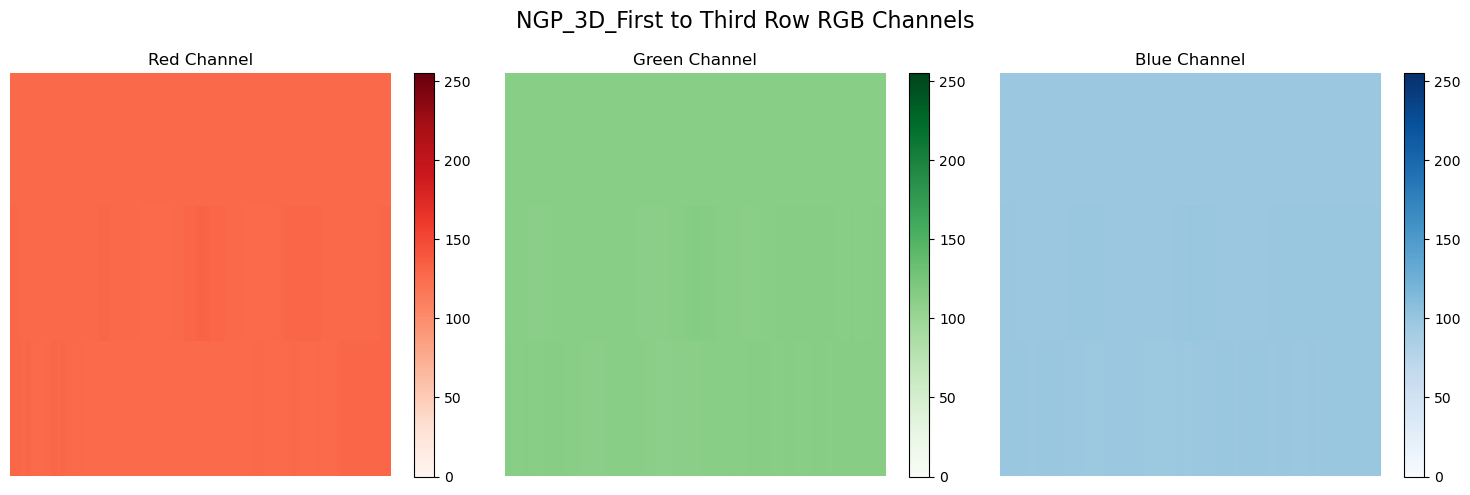

(3, 1024)
(3, 1024)
(3, 1024)


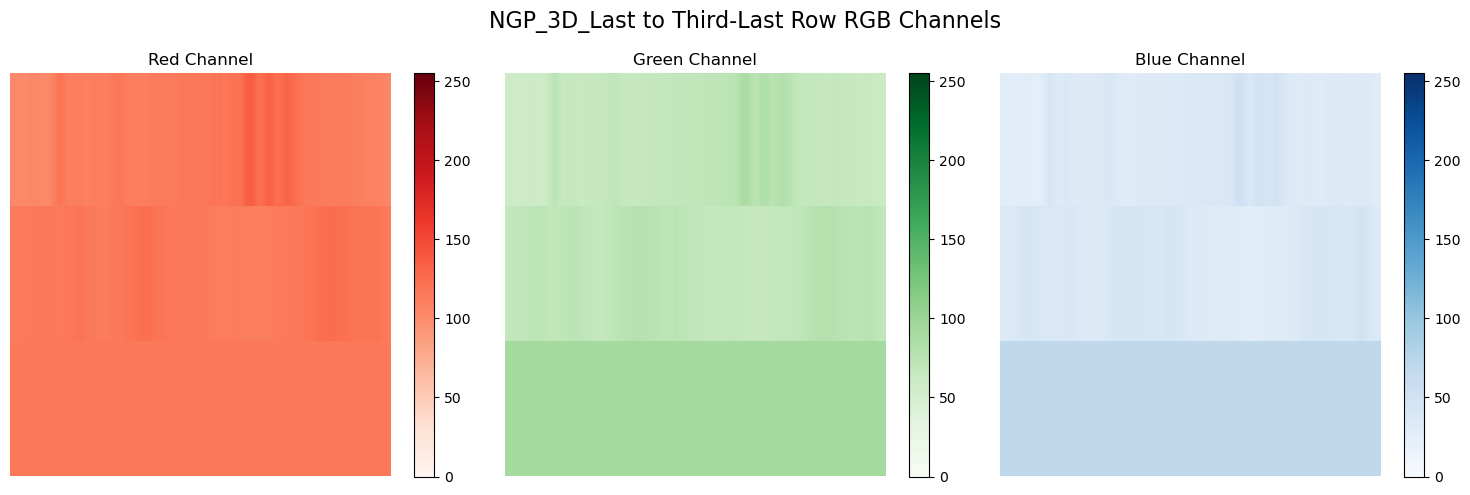

(512, 3)
(512, 3)
(512, 3)


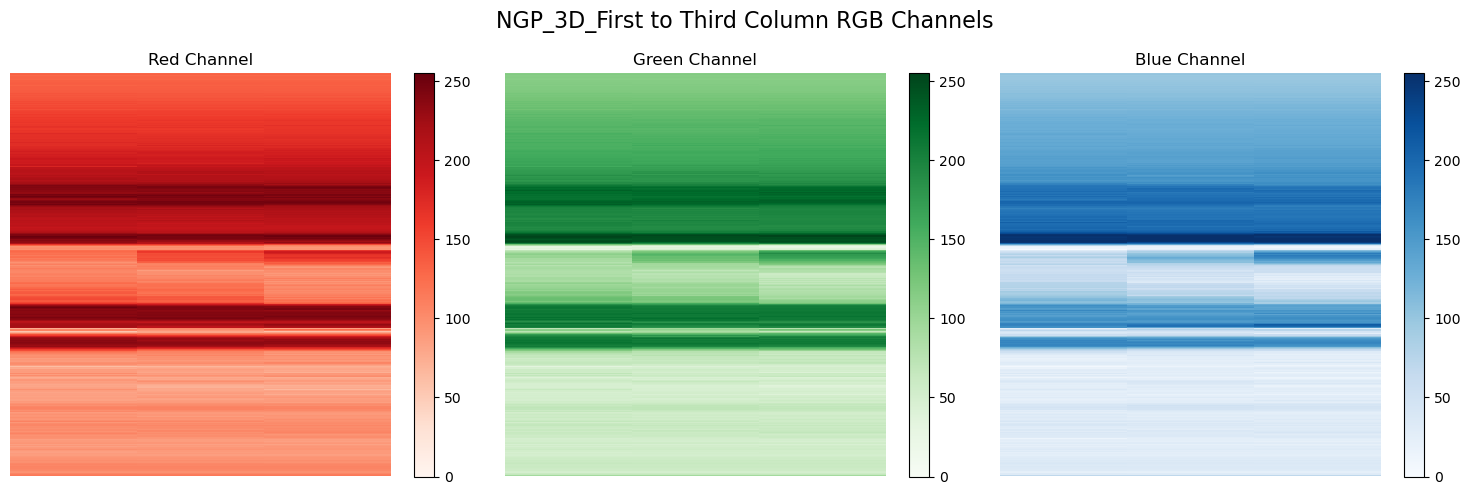

(512, 3)
(512, 3)
(512, 3)


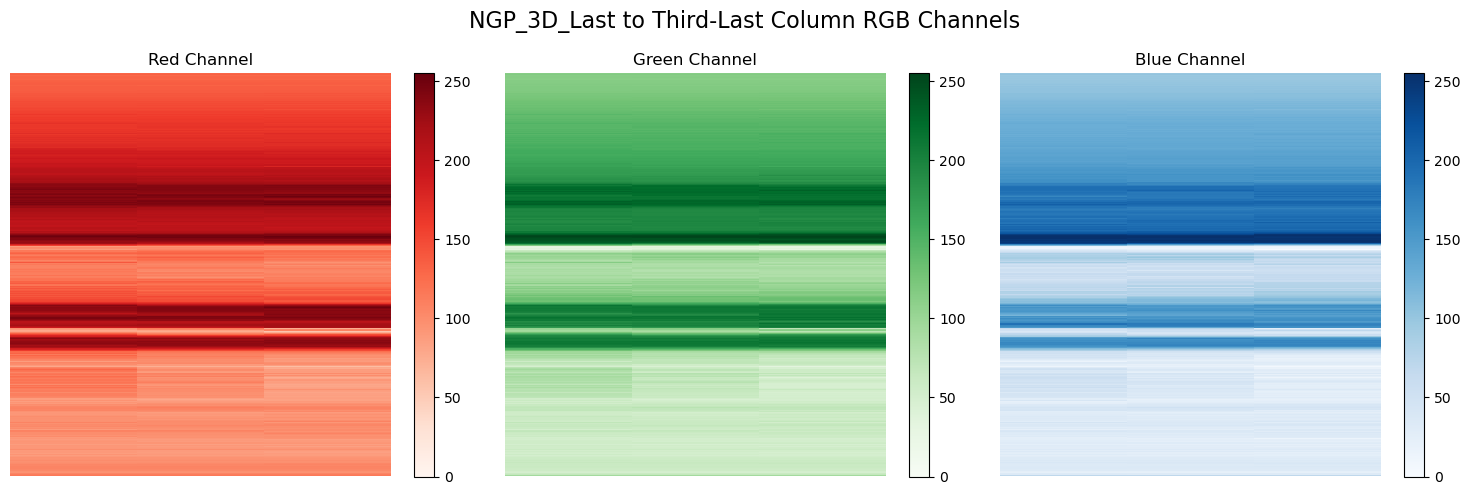

In [41]:
file_path_list = ['./dataset/sun360/1.jpg', './image/gauss_image_pred.png','./image/ngp_image_pred.png', './image/ngp_3d_image_pred.png']
method_list = ['Ground Truth', 'Gauss', 'NGP', 'NGP_3D']
for filepath, method in zip(file_path_list, method_list):
    run(filepath, method)